In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [3]:
data = np.load('reg_data_noise.npy')

In [4]:
xs = data[:, :-1]
ys = data[:,-1]

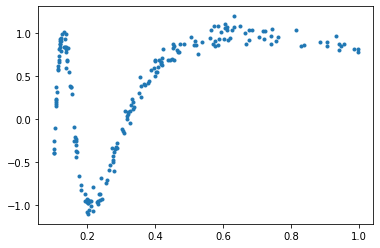

In [5]:
plt.plot(xs,ys,'.');

In [6]:
model = torch.nn.Sequential(torch.nn.Linear(1,16),torch.nn.ReLU(), 
                            torch.nn.Linear(16,8),torch.nn.ReLU(), 
                            torch.nn.Linear(8,1))

In [7]:
t_xs = torch.from_numpy(xs).view(-1,1)
t_ys = torch.from_numpy(ys).view(-1,1)
t_out = model(t_xs)

In [8]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(160,40))

In [9]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=len(train_set))

In [10]:
optimizer = torch.optim.SGD(model.parameters(),lr =0.01)

In [11]:
loss_func = torch.nn.MSELoss()

In [12]:
err_train=[]
err_valid=[]

In [13]:
%%time

for epoch in range(500000):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        vpred  = model(valid_set[:][0])
        vloss  = loss_func(vpred,valid_set[:][1])
        err_valid.append(vloss)
        pred  = model(train_set[:][0])
        loss  = loss_func(pred,train_set[:][1])
        err_train.append(loss)
    if epoch%1000 == 0:
        print("epoch %d %f %f " % (epoch, loss, vloss))   

epoch 0 0.506927 0.577768 
epoch 1000 0.302259 0.327587 
epoch 2000 0.294394 0.320398 
epoch 3000 0.287597 0.312478 
epoch 4000 0.279251 0.302477 
epoch 5000 0.267229 0.287904 
epoch 6000 0.248522 0.264681 
epoch 7000 0.219694 0.229336 
epoch 8000 0.177077 0.176698 
epoch 9000 0.127102 0.117929 
epoch 10000 0.094721 0.078232 
epoch 11000 0.083708 0.061730 
epoch 12000 0.080673 0.056314 
epoch 13000 0.079457 0.054177 
epoch 14000 0.078494 0.052782 
epoch 15000 0.077542 0.051726 
epoch 16000 0.076569 0.050830 
epoch 17000 0.075584 0.050108 
epoch 18000 0.074578 0.049345 
epoch 19000 0.073537 0.048531 
epoch 20000 0.072374 0.047477 
epoch 21000 0.071269 0.046555 
epoch 22000 0.070146 0.045658 
epoch 23000 0.069006 0.044740 
epoch 24000 0.067852 0.043805 
epoch 25000 0.066689 0.042876 
epoch 26000 0.065522 0.041993 
epoch 27000 0.071781 0.048986 
epoch 28000 0.070391 0.048277 
epoch 29000 0.067435 0.045599 
epoch 30000 0.062394 0.040699 
epoch 31000 0.060608 0.038617 
epoch 32000 0.059798 

epoch 260000 0.008074 0.007807 
epoch 261000 0.007041 0.007148 
epoch 262000 0.007048 0.007113 
epoch 263000 0.007050 0.007105 
epoch 264000 0.007016 0.007081 
epoch 265000 0.007034 0.007091 
epoch 266000 0.006996 0.007067 
epoch 267000 0.006998 0.007070 
epoch 268000 0.007054 0.007112 
epoch 269000 0.006979 0.007060 
epoch 270000 0.007591 0.007449 
epoch 271000 0.007828 0.007635 
epoch 272000 0.006923 0.006994 
epoch 273000 0.007282 0.007225 
epoch 274000 0.006953 0.007021 
epoch 275000 0.006992 0.007085 
epoch 276000 0.007176 0.007209 
epoch 277000 0.006970 0.007053 
epoch 278000 0.007265 0.007268 
epoch 279000 0.007063 0.007134 
epoch 280000 0.006953 0.007055 
epoch 281000 0.006935 0.007024 
epoch 282000 0.006948 0.007041 
epoch 283000 0.007051 0.007124 
epoch 284000 0.006975 0.007069 
epoch 285000 0.006963 0.007040 
epoch 286000 0.006955 0.007045 
epoch 287000 0.006985 0.007073 
epoch 288000 0.007073 0.007138 
epoch 289000 0.006988 0.007075 
epoch 290000 0.007011 0.007088 
epoch 29

In [14]:
torch.save(model, "regression_3.pt")

/home/neofelia/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/neofelia/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


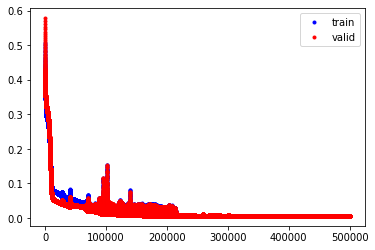

In [15]:
plt.plot(err_train, '.', label='train', color = 'blue')
plt.plot(err_valid, '.', label='valid', color = 'red');
plt.legend()

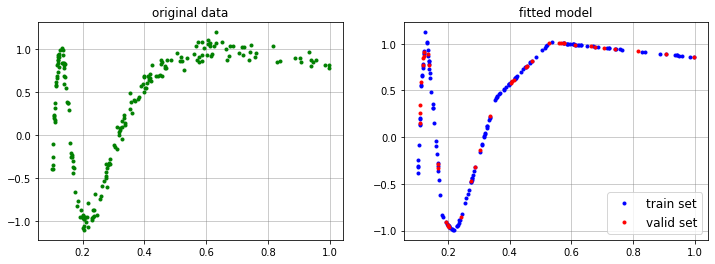

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharex=True)

ax[0].set_title('original data')
ax[1].set_title('fitted model')
ax[0].grid(True, color = 'gray', alpha = 0.5)
ax[1].grid(True, color = 'gray', alpha = 0.5)

ax[0].plot(xs,ys,'.', color = 'green')

t_out_train = model(train_set[:][0])
x = t_out_train.data.view(-1).numpy()
y = train_set[:][0].data.numpy()

ax[1].plot(y, x, '.',color = 'blue', label = 'train set')

t_out_valid = model(valid_set[:][0])
x =  t_out_valid.data.view(-1).numpy()
y = valid_set[:][0].data.numpy()

ax[1].plot(y, x,'.', color = 'red', label = 'valid set')

ax[1].legend(loc='lower right', fontsize = 12)

plt.show()